https://www.cs.toronto.edu/~kriz/cifar.html

# cnn 딥러닝 학습

## 모델 불러오기

In [4]:
from keras.datasets import cifar10
# cifar 데이터 불러오기



- 샘플이미지 분류 확인
- confusion matrix, f1

(<matplotlib.image.AxesImage at 0x2781ea27c10>,
 <matplotlib.image.AxesImage at 0x2781ea278e0>)

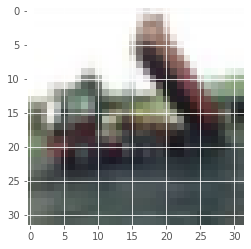

In [85]:

plt.imshow((X_train[0])),plt.imshow((X_train[2]))

## 훈련 검증 분리

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## 데이터 정규화

In [43]:
import numpy as np 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# 픽셀값 ;

X_test /= 255
X_train /= 255

## y 원핫 인코딩

In [44]:
from tensorflow.keras.utils import to_categorical
y_trainONE = to_categorical(y_train)

## 모델링

# dropout쓴거

In [67]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from keras.layers import Dropout

# 모델 생성  - 신경망 생성
model = Sequential()     
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3 ), activation='relu', padding='same'))
# drop out(0.15)의미?  은닉층에 배치된 노드 중 15%를 임의로 꺼줌.
model.add(Dropout(0.15))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))




model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.15))
          

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))    
model.add(Dropout(0.15))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_trainONE, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5928 - acc: 0.4085
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1705 - acc: 0.5748
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0131 - acc: 0.6397
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9134 - acc: 0.6758
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8395 - acc: 0.7029
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7803 - acc: 0.7239
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7387 - acc: 0.7388
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6999 - acc: 0.7525
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6725 - acc: 0.7631
Epoch 10/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6539 - acc: 0.7694


# dropout 안쓴거

In [45]:
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
# from tensorflow.keras import Sequential

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(32,32,3), activation='relu', padding='same')) 
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size = (2,2))) #가장 큰 값 출력?
# model.add(Flatten())
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=10, activation='softmax')) #마지막은 분류갯수
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# model.fit(X_train, y_trainONE, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3528 - acc: 0.5181
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9746 - acc: 0.6580
Epoch 3/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8347 - acc: 0.7103
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7219 - acc: 0.7501
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6179 - acc: 0.7867
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5252 - acc: 0.8189
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4359 - acc: 0.8483
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.3514 - acc: 0.8783
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2865 - acc: 0.8993
Epoch 10/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2286 - acc: 0.9189


## 샘플이미지( test[0]) 분류 확인

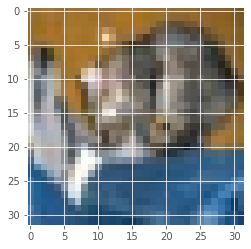

In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.imshow(X_test[0])   # [면, 행, 열]
plt.show()

In [71]:
model.predict(X_test[0].reshape(-1,32,32,3))

array([[1.6056738e-04, 8.1614067e-05, 3.2239949e-04, 9.4261277e-01,
        1.5231602e-04, 3.8016267e-02, 1.4631090e-02, 6.6727684e-05,
        3.9410773e-03, 1.5171632e-05]], dtype=float32)

In [72]:
model.predict(X_test[0].reshape(-1,32,32,3)).argmax(axis=1)
# 3 고양이


array([3], dtype=int64)

## 훈련 테스트 정확도


In [73]:
model.evaluate(X_train,y_trainONE)

1563/1563 [==============================] - 11s 7ms/step - loss: 0.5110 - acc: 0.8249


[0.5109558701515198, 0.8249199986457825]

In [74]:
model.evaluate(X_test, to_categorical(y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.7341 - acc: 0.7495


[0.7340759038925171, 0.7494999766349792]

## cofusion 

In [75]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [76]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [77]:
from sklearn.metrics import confusion_matrix

# 훈련 
confusion_matrix(y_train, model.predict( X_train.reshape(-1,32,32,3)).argmax(axis=1))

array([[3902,   17,  189,   81,   40,   19,   40,   18,  565,  129],
       [  27, 4511,   12,   25,    6,    8,   45,    6,  132,  228],
       [ 159,    4, 3927,  204,  191,  102,  285,   38,   81,    9],
       [  44,    4,  246, 3643,  123,  538,  254,   59,   79,   10],
       [  57,    3,  270,  303, 3812,  118,  266,  102,   65,    4],
       [  13,    3,  249,  881,  120, 3497,  107,  109,   17,    4],
       [   5,    1,   87,  209,   55,   64, 4539,    4,   33,    3],
       [  23,    5,  139,  230,  202,  206,   37, 4127,   16,   15],
       [  60,   26,   24,   37,    6,    5,   14,    5, 4794,   29],
       [  44,  158,   13,   76,   13,   12,   42,   19,  129, 4494]],
      dtype=int64)

Text(33.0, 0.5, 'Real')

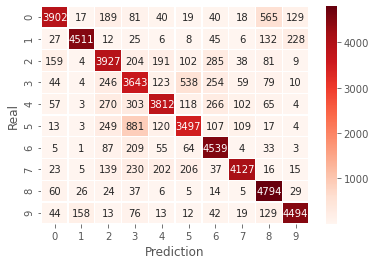

In [78]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train, model.predict( X_train.reshape(-1,32,32,3)).argmax(axis=1)),
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')

In [79]:
# 검증 
confusion_matrix(y_test, model.predict( X_test.reshape(-1,32,32,3)).argmax(axis=1))

array([[695,   7,  63,  23,  13,   4,  14,   3, 140,  38],
       [ 10, 845,   1,  12,   1,   6,  14,   3,  39,  69],
       [ 56,   3, 694,  48,  61,  43,  66,  15,  12,   2],
       [ 17,   3,  86, 625,  37, 125,  66,  20,  18,   3],
       [ 10,   1,  65,  83, 666,  42,  78,  35,  20,   0],
       [  8,   1,  70, 201,  27, 621,  27,  33,  10,   2],
       [  4,   2,  36,  55,  14,  16, 861,   2,  10,   0],
       [  8,   1,  52,  60,  55,  55,  14, 744,   5,   6],
       [ 25,  16,  10,  14,   1,   2,   8,   2, 909,  13],
       [ 15,  64,   5,  21,   2,   7,   8,   8,  35, 835]], dtype=int64)

Text(33.0, 0.5, 'Real')

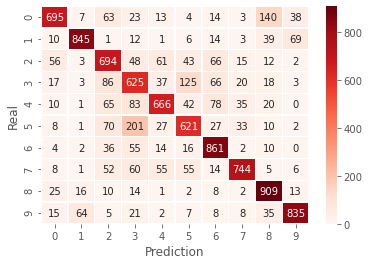

In [80]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, model.predict( X_test.reshape(-1,32,32,3)).argmax(axis=1)),
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')

## f1

In [81]:
from sklearn.metrics import  f1_score
f1_score(y_test, model.predict( X_test.reshape(-1,32,32,3)).argmax(axis=1), average='macro')

0.7500617545666127